In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential,Model 
from keras.layers.core import Dense,Dropout,Activation,Flatten,Reshape
from keras.layers import Embedding,Input ,merge, ELU
from keras.layers.recurrent import SimpleRNN , LSTM 
from keras.layers.convolutional import Convolution2D , MaxPooling2D
from keras.optimizers import SGD ,Adam,RMSprop
from keras.regularizers import l2,l1
from keras.utils.np_utils import to_categorical 
from keras import backend as K
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
from keras.layers.convolutional import MaxPooling2D 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from keras.layers import GlobalMaxPooling2D
import tensorflow
import math
import numpy as np

In [3]:
import glob #grab some files 
from tqdm import tqdm # to look at progress bars
import scipy # Used for image processing 
import scipy.misc
import pandas as pd
import h5py as hp


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

data_1=np.load('/content/drive/My Drive/Cam/data_set.npz')
X_train_imgs=data_1['img_train']

X_test_imgs=data_1['img_test']
spds_t=data_1['spds']
accel_t=data_1['accel']
speedx=np.column_stack((data_1['spds'],data_1['accel']))
#speedx=speedx.reshape((-1,2))
steer_t=data_1['steer']
gas_t=data_1['gas']
brake_t=data_1['brake']
print(brake_t.shape)
print("brake= ",brake_t)
y1=np.column_stack((speedx,steer_t))
#y_t=y_t.reshape((2,-1))
y1=np.column_stack((data_1['steer'],data_1['gas']))   #,data_1['brake'])
#y1=y1.reshape(-1,2)
y2=np.column_stack((speedx,y1))
#y2=y2.reshape(-1,4)
y_t=np.column_stack((y2,brake_t))
print(steer_t[1100:1110])
#y_t=y_t.reshape((-1,5))
#print(steer_t)
#print(speedx[10:20])
#print(" \n X_t",X_t)

y_t=np.array(y_t)
y_t_tr=y_t[0:X_train_imgs.shape[0]]
y_t_ts=y_t[0:X_test_imgs.shape[0]]
#print(y_t[2][100:120])
print("\n y_train :",y_t_tr.shape)
print("\n y_test :",y_t_ts.shape)# Checking 7 examples
print("\n X_train_imgs shape :",X_train_imgs.shape)
print("\n X_test_imgs shape :",X_test_imgs.shape)
#np.reshape(X_t,X_t.shape[0],X_t.shape[2],X_t.shape[3],X_t.shape[1])
#print("\n X_t shape is now changed as per tf style :",X_t.shape)

#print("\n ",brake_t)  /content/data_set.npz


(51691,)
brake=  [1.         1.         1.         ... 0.0290702  0.02920806 0.02902903]
[0.49766992 0.49766992 0.49766992 0.49766992 0.49766992 0.49766992
 0.49766992 0.49766992 0.49766992 0.49766992]

 y_train : (46521, 5)

 y_test : (5168, 5)

 X_train_imgs shape : (46521, 3, 80, 80)

 X_test_imgs shape : (5168, 3, 80, 80)


In [6]:
import math
data_2=np.load('/content/drive/My Drive/Cam/data_set_2.npz')
X2_t=data_2['X_t']   
len=math.floor(0.9*X2_t.shape[0])
y2_t=data_2['y_t']

X2_tr=X2_t[0:len]
X2_ts=X2_t[len+1:-1]
y2_tr=y2_t[0:len]
y2_ts=y2_t[len+1:-1]

print(X2_tr.shape)
print(y2_tr.shape)
print(X2_ts.shape)
print(y2_ts.shape)

(45129, 3, 80, 80)
(45129, 5)
(5013, 3, 80, 80)
(5013, 5)


In [7]:
data_5=np.load('/content/drive/My Drive/Cam/data_set_5.npz')
X5_tr=data_5['X_train_imgs']
X5_ts=data_5['X_test_imgs']
y5_tr=data_5['y_train_imgs']
y5_ts=data_5['y_test_imgs']
print(X5_tr.shape)
print(y5_tr.shape)

(76766, 3, 80, 80)
(76766, 5)


In [8]:
X_train_fn=np.concatenate((X5_tr,X2_tr))
X_test_fn=np.concatenate((X5_ts,X2_ts))
y_train_fn=np.concatenate((y5_tr,y2_tr))
y_test_fn=np.concatenate((y5_ts,y2_ts))
X_train_fn.shape


(121895, 3, 80, 80)

In [9]:
X_train=np.concatenate((X_train_fn,X_train_imgs))
X_test=np.concatenate((X_test_fn,X_test_imgs))
y_train=np.concatenate((y_train_fn,y_t_tr))
y_test=np.concatenate((y_test_fn,y_t_ts))
print("Shape of X_train",X_train.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test :",y_test.shape)

Shape of X_train (168416, 3, 80, 80)
Shape of y_train : (168416, 5)
Shape of X_test (18709, 3, 80, 80)
Shape of y_test : (18709, 5)


In [10]:
del X5_tr,X5_ts,y5_tr,y5_ts
del X2_tr,X2_ts,y2_tr,y2_ts
del X_train_fn,X_train_imgs,X_test_imgs
del y_train_fn,y_t_tr,y_t_ts

In [11]:
np.savez('full_set.npz',   # Speed ,accel ,steer, gas, brake is the sequence
         X_train=X_train,
         y_train=y_train,
         X_test=X_test,
         y_test=y_test)

In [12]:
!cp '/content/full_set.npz'  '/content/drive/My Drive/Cam/full_set.npz'

In [5]:
data=np.load('/content/drive/My Drive/Cam/full_set.npz')
X_train=data['X_train']
X_test=data['X_test']
y_train=data['y_train']
y_test=data['y_test']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(173431, 3, 80, 80)
(173431, 5)
(13696, 3, 80, 80)
(13696, 5)


In [13]:
spds_tr=y_train[:,0]
spds_ts=y_test[:,0]

In [14]:
accel_tr=y_train[:,1]
accel_ts=y_test[:,1]

In [15]:
steer_tr=y_train[:,2]
steer_ts=y_test[:,2]

In [16]:
gas_tr=y_train[:,3]
gas_ts=y_test[:,3]

In [17]:
brake_tr=y_train[:,4]
brake_ts=y_test[:,4]

In [18]:
import keras.backend.tensorflow_backend as tfback
def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).

    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

tfback._get_available_gpus = _get_available_gpus

In [19]:
def make_model(X,Y):
    model=Sequential()
              #model.add(Dense(10,activation='relu')) #input layer
    model.add(Convolution2D(128,(3,3),input_shape=(3,80,80),activation='relu',data_format='channels_first')) #1st conv layer
    model.add(MaxPooling2D())       #pool_size=(2,2),data_format='channels_last'
    #x=modl(inputs)                  #add model layers
                      #model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))
    model.add(Convolution2D(256,(3,3),activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D())
    #model.add(Dropout(0.5))
    #x=modl(inputs)           #pool_size=(2,2),data_format='channels_first
    model.add(Convolution2D(256,(3,3),activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D())
    #model.add(Dropout(0.25))
    #x=modl(inputs)     #pool_size=(2,2),data_format='channels_first'
    model.add(Convolution2D(128,(3,3),activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D())
    #model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
    model.add(Convolution2D(128,(3,3),activation='relu',data_format='channels_first'))
    model.add(GlobalMaxPooling2D()) 
    #model.add(Dropout(0.2))
    #x=modl(inputs)        #
    #model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    #model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.1))
    #x=modl(inputs)
    model.add(Dense(64, activation='relu'))
    #x=modl(inputs)
    model.add(Dense(5,activation='linear'))
    #model= Model(inputs=inputs,outputs=outputs)
    print(model.summary())
    model.compile(loss='mae',optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(X,Y, batch_size=500, epochs=10, validation_split=0.15)
    return history

In [13]:
full_model=make_model(X_train,y_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 78, 78)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 39, 78)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 37, 76)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 18, 76)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 16, 74)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 8, 74)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 6, 72)       

In [14]:
# save entire model to HDF5 
full_model.model.save("full_model.h5")
!cp "/content/full_model.h5"  "/content/drive/My Drive/Cam/full_model.h5"

0.19324605

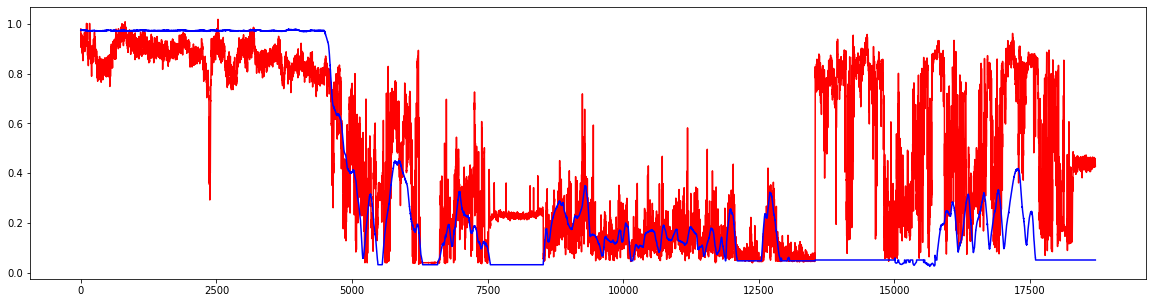

In [29]:
from keras.models import load_model
import matplotlib.pyplot as plt
#from keras.losses import MeanAbsoluteError as mae

#h5f=hp.File('/content/full_model.h5py','r')
full_model=tf.keras.models.load_model('full_model.h5')
#full_model=h5f.get('full_model.h5')
#model_f=np.array(model_f)

y_pred=full_model.predict(X_test)

mae = tf.keras.losses.MeanAbsoluteError()



#print("mean absoulte error is :",)
plt.rcParams["figure.figsize"] = (20,5)

plt.plot(y_pred[:,0],color='red')
plt.plot(spds_ts,color='blue')
mae(spds_ts, y_pred[:,0]).numpy()

The above graph shows the performance of the model to predict speed 
 on unseen data.

The above graph shows difference between labelled and calculated data .


0.058295168

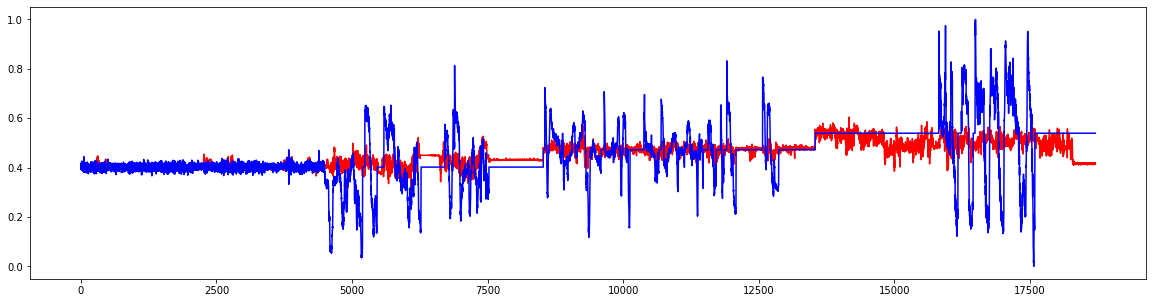

In [30]:
plt.plot(y_pred[:,1],color='red')  #Acceleration
plt.plot(accel_ts,color='blue')
mae(accel_ts, y_pred[:,1]).numpy()

In [31]:
print(X_test.shape)
print(y_test.shape)

(18709, 3, 80, 80)
(18709, 5)


0.03721221

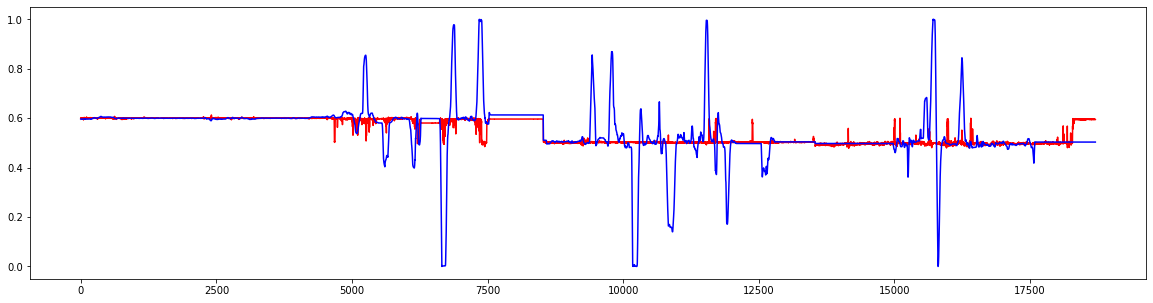

In [32]:
plt.plot(y_pred[:,2],color='red')  #Steer
plt.plot(steer_ts,color='blue')
mae(steer_ts, y_pred[:,2]).numpy()

0.06810357

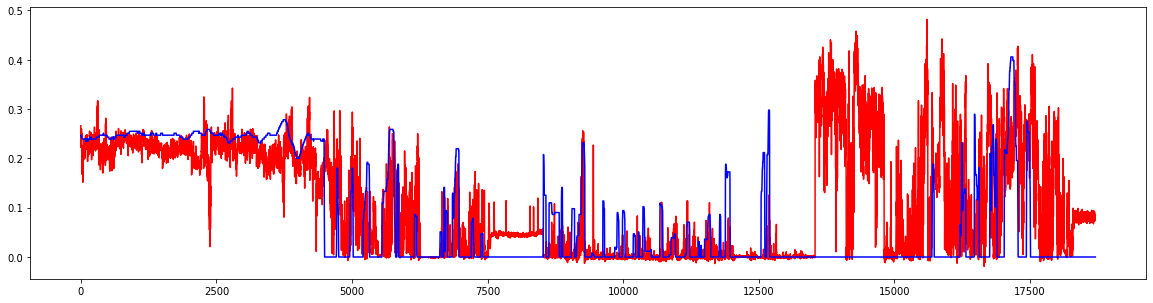

In [34]:
plt.plot(y_pred[:,3],color='red')  #Gas
plt.plot(gas_ts,color='blue')
mae(gas_ts, y_pred[:,3]).numpy()

0.076064326

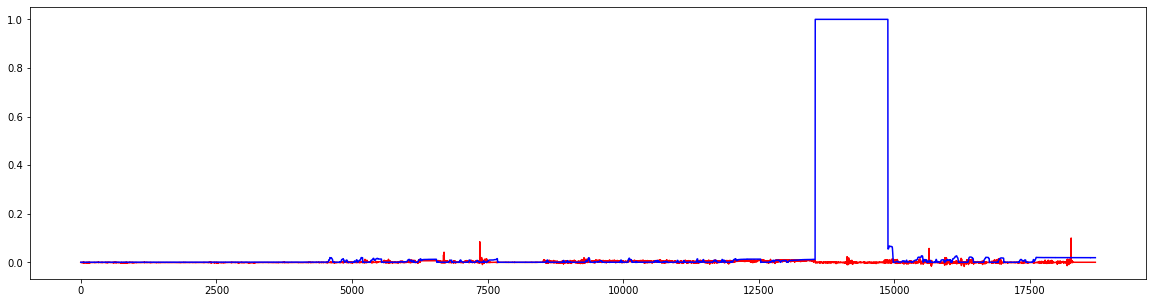

In [33]:
plt.plot(y_pred[:,4],color='red')  #Brake
plt.plot(brake_ts,color='blue')
mae(brake_ts, y_pred[:,4]).numpy()

In [35]:
def make_model_1(X,Y):
    model=Sequential()
              #model.add(Dense(10,activation='relu')) #input layer
    model.add(Convolution2D(128,(3,3),input_shape=(3,80,80),activation='relu',data_format='channels_first')) #1st conv layer
    model.add(MaxPooling2D())       #pool_size=(2,2),data_format='channels_last'
    #x=modl(inputs)                  #add model layers
                      #model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))
    model.add(Convolution2D(256,(3,3),activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D())
    #model.add(Dropout(0.5))
    #x=modl(inputs)           #pool_size=(2,2),data_format='channels_first
    model.add(Convolution2D(256,(3,3),activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D())
    #model.add(Dropout(0.25))
    #x=modl(inputs)     #pool_size=(2,2),data_format='channels_first'
    model.add(Convolution2D(128,(3,3),activation='relu',data_format='channels_first'))
    model.add(MaxPooling2D())
    #model.add(MaxPooling2D(pool_size=(2,2),data_format='channels_first'))
    model.add(Convolution2D(128,(3,3),activation='relu',data_format='channels_first'))
    model.add(GlobalMaxPooling2D()) 
    #model.add(Dropout(0.2))
    #x=modl(inputs)        #
    #model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    #model.add(Dense(64, activation='relu'))
    #model.add(Dropout(0.1))
    #x=modl(inputs)
    model.add(Dense(64, activation='relu'))
    #x=modl(inputs)
    model.add(Dense(1,activation='linear'))
    #model= Model(inputs=inputs,outputs=outputs)
    print(model.summary())
    model.compile(loss='mae',optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(X,Y, batch_size=500, epochs=10, validation_split=0.15)
    return history

In [24]:
speed_model=make_model_1(X_train,spds_tr)    # Model for speed # 20 epochs

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 78, 78)       3584      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 39, 78)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 37, 76)       147712    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 18, 76)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 256, 16, 74)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 8, 74)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 6, 72)       

In [27]:
speed_model.model.save("speed_model.h5")  # this is speed model not steer model 
!cp "/content/speed_model.h5"  "/content/drive/My Drive/Cam/speed_model.h5"

0.39489824

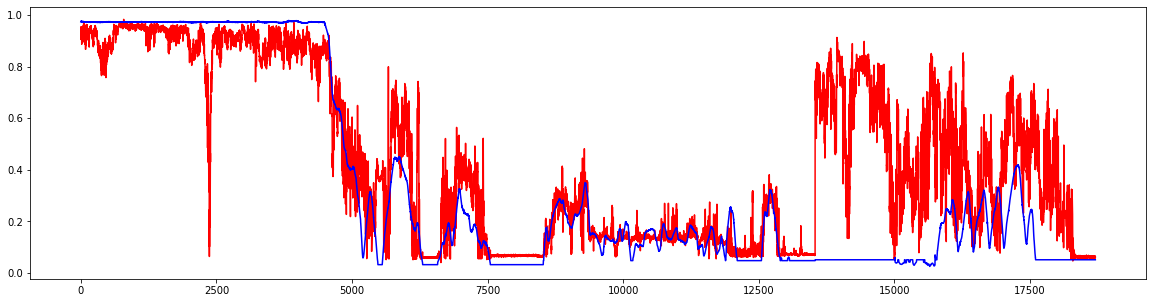

In [37]:
speed_model=tf.keras.models.load_model('speed_model.h5')
spds_pred=speed_model.predict(X_test)  # Speed after 20 epochs 

plt.plot(spds_pred,color='red')
plt.plot(spds_ts,color='blue')
mae(spds_ts,spds_pred).numpy()

In [ ]:
accel_model=make_model_1(X_train,accel_tr)

In [ ]:
accel_model.model.save("accel_model.h5")
!cp "/content/accel_model.h5"  "/content/drive/My Drive/Cam/accel_model.h5"

In [32]:
ster_model=make_model_1(X_train,steer_tr)  # Good with 6 epochs

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 128, 78, 78)       3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 39, 78)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 256, 37, 76)       147712    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 18, 76)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 256, 16, 74)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 128, 8, 74)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 6, 72)       

0.073977284

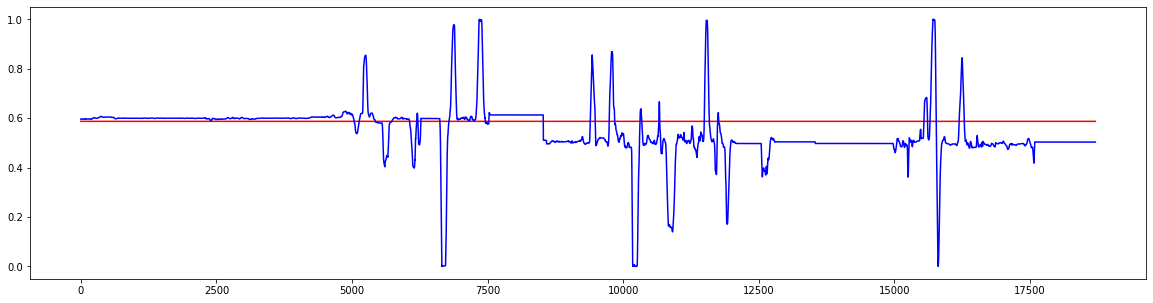

In [39]:
steer_model=tf.keras.models.load_model('ster_model.h5')
ster_pred=steer_model.predict(X_test)  # Speed after 20 epochs 

plt.plot(ster_pred,color='red')
plt.plot(steer_ts,color='blue')
mae(steer_ts,ster_pred).numpy()

In [40]:
gas_model=make_model_1(X_train,gas_tr) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 78, 78)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 39, 78)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 37, 76)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 18, 76)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 16, 74)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 8, 74)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 6, 72)       

ResourceExhaustedError: ignored

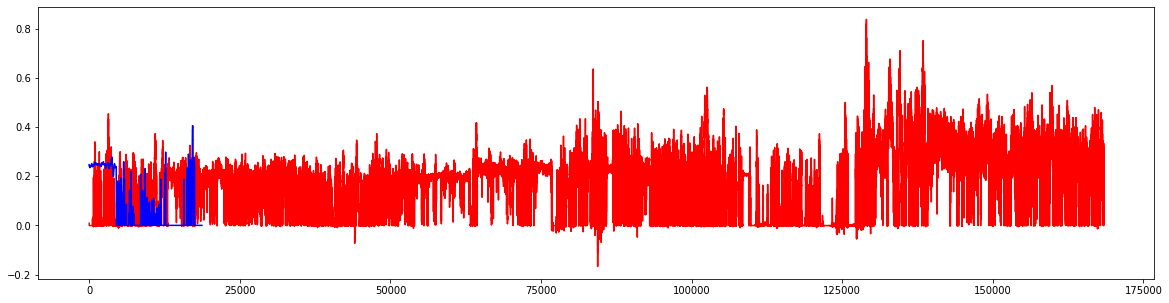

In [42]:
gas_pred=gas_model.model.predict(X_train)

plt.plot(gas_pred,color='red')
plt.plot(gas_ts,color='blue')
mae(gas_ts,gas_pred).numpy()

In [43]:
gas_model.model.save("gas_model.h5")
!cp "/content/gas_model.h5"  "/content/drive/My Drive/Cam/gas_model.h5"

In [ ]:
brake_model=make_model_1(X_train,brake_tr)

In [ ]:
brake_model.model.save("brake_model.h5")
!cp "/content/brake_model.h5"  "/content/drive/My Drive/Cam/brake_model.h5"